In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from OptionPlayTranslator import *

In [2]:

# srcDataFrame = pd.read_csv('optionsDX/aapl_2022/aapl_eod_2022q4-86egbl/aapl_eod_202210.txt')
srcDataFrame = pd.read_csv('tslaReduced.csv')

df = pd.DataFrame(srcDataFrame)
df.columns = df.columns.str.strip()

/var/folders/p_/r9zh86p106b8yh2ly8zzjbw00000gn/T/ipykernel_42628/155347403.py:2: DtypeWarning: Columns (4,5,6,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  srcDataFrame = pd.read_csv('tslaReduced.csv')


In [3]:
dayGroups = df.groupby('[QUOTE_DATE]')

In [4]:

opt = OPT('TSLA', dayGroups)
# print(opt.ticker)
# opt.find_plays(' 2019-10-01', ' 2020-01-16',200)

In [5]:
predictions = pd.read_csv('tsla_predictions.csv')
x = predictions.iloc[30]

# PLOT ALL OUTCOMES

In [6]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',100, False, False))
    if play is not None:
        pred_dates.append(pred['Date'])
        sharePnL.append(play[0])
        optionPnL.append(play[1])
        optionOutperformance.append(play[2])

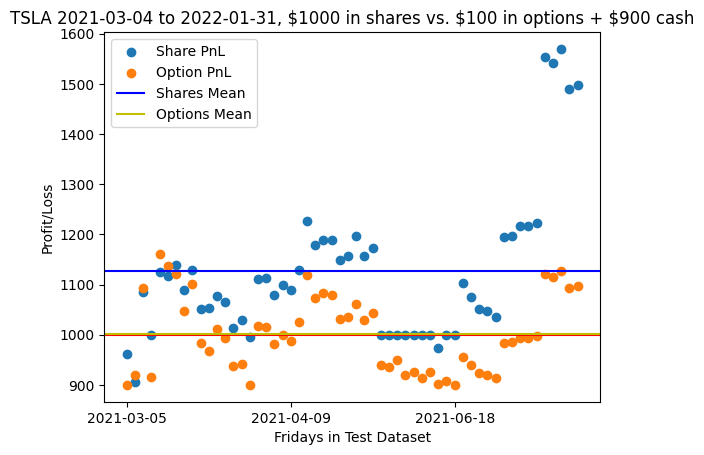

In [7]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA 2021-03-04 to 2022-01-31, $1000 in shares vs. $100 in options + $900 cash')
plt.xticks(range(0,60,20))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
plt.axhline(y=1000, color='r', linestyle='-')
plt.axhline(y=np.mean(sharePnL), color='b', linestyle='-', label='Shares Mean')
plt.axhline(y=np.mean(optionPnL), color='y', linestyle='-', label='Options Mean')
plt.legend()

In [8]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',500, False, False))
    if play is not None:
        pred_dates.append(pred['Date'])
        sharePnL.append(play[0])
        optionPnL.append(play[1])
        optionOutperformance.append(play[2])


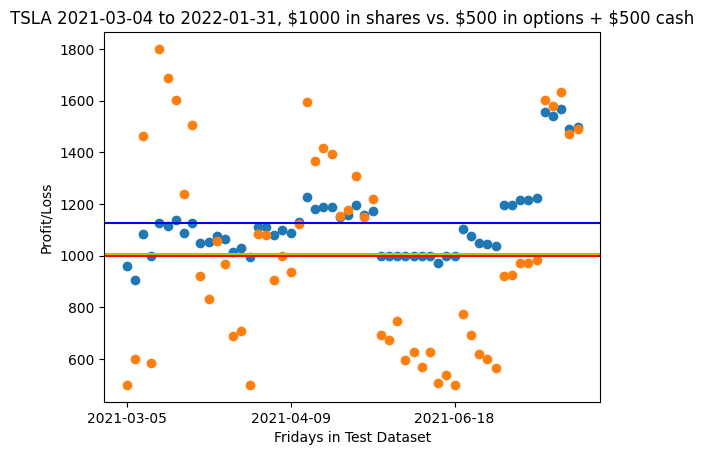

In [9]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA 2021-03-04 to 2022-01-31, $1000 in shares vs. $500 in options + $500 cash')
plt.xticks(range(0,60,20))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
plt.axhline(y=1000, color='r', linestyle='-')
plt.axhline(y=np.mean(sharePnL), color='b', linestyle='-', label='Shares Mean')
plt.axhline(y=np.mean(optionPnL), color='y', linestyle='-', label='Options Mean')

In [10]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
predicted_returns = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    if cur.weekday() == 4:
        play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',1000, False, False))
        if play is not None:
            pred_dates.append(pred['Date'])
            sharePnL.append(play[0])
            optionPnL.append(play[1])
            optionOutperformance.append(play[2])
            predicted_returns.append(play[3])

In [11]:
optionPnL = optionPnL[1:]
sharePnL = sharePnL[1:]
pred_dates = pred_dates[1:]

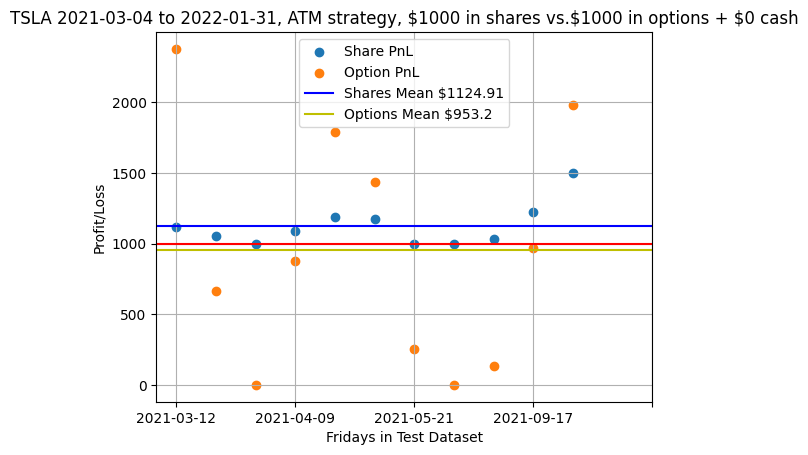

In [12]:
plt.scatter(pred_dates, sharePnL, label='Share PnL')
plt.scatter(pred_dates, optionPnL, label='Option PnL')
plt.title('TSLA 2021-03-04 to 2022-01-31, ATM strategy, $1000 in shares vs.$1000 in options + $0 cash')
plt.xticks(range(0,13,3))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
plt.axhline(y=1000, color='r', linestyle='-')
shareMean = round((np.mean(sharePnL)),2)
optionMean = round((np.mean(optionPnL)),2)
plt.axhline(y=shareMean, color='b', linestyle='-', label=f'Shares Mean ${shareMean}')
plt.axhline(y=optionMean, color='y', linestyle='-', label=f'Options Mean ${optionMean}')
plt.legend()
plt.grid(True)

# PICKING SHARES OR OPTIONS BASED ON PREDICTED RETURNS

In [13]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
predicted_PnL_shares = []
predicted_PnL_options = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    if cur.weekday() == 4:
        play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),'ATM',1000, False, False))
        if play is not None:
            pred_dates.append(pred['Date'])
            sharePnL.append(play[0])
            optionPnL.append(play[1])
            optionOutperformance.append(play[2])
            predicted_PnL_shares.append(play[3])
            predicted_PnL_options.append(play[4])

choose_higher_predicted = []
choose_higher_actual = []
# markers = []

# starting from 1 because the option only has 1 day to play out that first week and throws it off. 
predicted_PnL_options = predicted_PnL_options[1:]
predicted_PnL_shares = predicted_PnL_shares[1:]
optionPnL = optionPnL[1:]
sharePnL = sharePnL[1:]
pred_dates = pred_dates[1:]

for i in range(0, len(predicted_PnL_shares)):
    if ((predicted_PnL_shares[i] < 1000) and (predicted_PnL_options[i] < 1000)):
        choose_higher_predicted.append(1000)
        choose_higher_actual.append(1000)
    elif predicted_PnL_shares[i] > predicted_PnL_options[i]:
        choose_higher_predicted.append(predicted_PnL_shares[i])
        choose_higher_actual.append(sharePnL[i])
        # markers.append('d')
    else: # options predicted to do better
        choose_higher_predicted.append(predicted_PnL_options[i])
        choose_higher_actual.append(optionPnL[i])
        # markers.append('o')


In [14]:
print( choose_higher_predicted)
print (choose_higher_actual)

[1061.17, 1125.4, 1055.63, 1102.01, 1175.17, 1176.48, 1000, 1000, 1078.76, 1198.66, 1462.62]
[1116.1264377061048, 1054.0014477599937, 995.4636853534948, 1089.0694120485805, 1189.543955602027, 1173.329043674093, 1000, 1000, 1035.9848789511784, 1222.6654870103757, 1497.8685755650286]


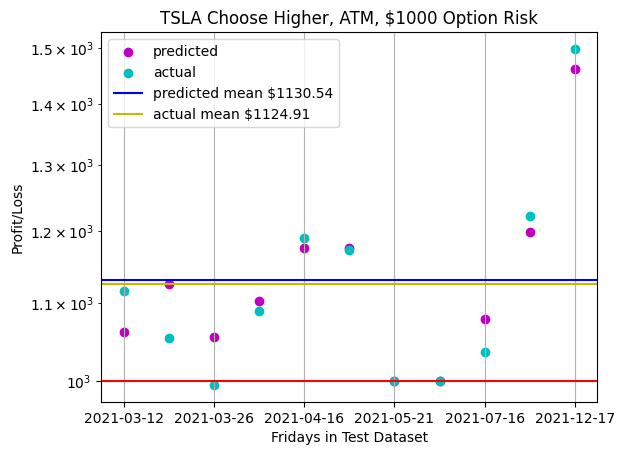

In [15]:
plt.scatter(pred_dates, choose_higher_predicted, label='predicted', color='m')
plt.scatter(pred_dates, choose_higher_actual, label='actual', color='c')
# plt.scatter(np.zeros(len(markers)), np.zeros(len(markers)), label='choose option', marker='o', color='black')
# plt.scatter(np.zeros(len(markers)), np.zeros(len(markers)), label='choose shares', marker='d', color='black')
plt.title('TSLA Choose Higher, ATM, $1000 Option Risk')
plt.xticks(range(0,len(choose_higher_actual), len(choose_higher_actual)//4))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
predicted_mean = round((np.mean(choose_higher_predicted)),2)
actual_mean =round(( np.mean(choose_higher_actual)),2)
plt.axhline(y=predicted_mean, color='b', linestyle='-', label=f'predicted mean ${predicted_mean}')
plt.axhline(y=actual_mean, color='y', linestyle='-', label = f'actual mean ${actual_mean}')
plt.axhline(y=1000, color='r', linestyle='-')
plt.legend()
plt.grid(True)

# At the Money (ATM) vs. Find Best Strike

In [ ]:
#hyperparameters
risk = 100
strike_strat = 'FIND_BEST_STRIKE'
ticker = 'TSLA'

In [48]:
pred_dates = []
sharePnL = []
optionPnL = []
optionOutperformance = []
predicted_PnL_shares = []
predicted_PnL_options = []
for i in range(len(predictions)):  
    pred = predictions.iloc[i]
    pred_list = np.array(pred['Date'].strip().split('-'), dtype=int)
    cur = date(*pred_list)
    if cur.weekday() == 4:
        play = (opt.find_plays(' 2021-03-04',' '+pred['Date'],float(pred['Pred']),{strike_strat},risk, 'FIND_BEST_STRIKE', False))
        if play is not None:
            pred_dates.append(pred['Date'])
            sharePnL.append(play[0])
            optionPnL.append(play[1])
            optionOutperformance.append(play[2])
            predicted_PnL_shares.append(play[3])
            predicted_PnL_options.append(play[4])

choose_higher_predicted = []
choose_higher_actual = []


# starting from 1 because the option only has 1 day to play out that first week and throws it off. 
predicted_PnL_options = predicted_PnL_options[1:]
predicted_PnL_shares = predicted_PnL_shares[1:]
optionPnL = optionPnL[1:]
sharePnL = sharePnL[1:]
pred_dates = pred_dates[1:]

for i in range(0, len(predicted_PnL_shares)):
    if ((predicted_PnL_shares[i] < 1000) and (predicted_PnL_options[i] < 1000)):
        choose_higher_predicted.append(1000)
        choose_higher_actual.append(1000)
    elif predicted_PnL_shares[i] > predicted_PnL_options[i]:
        choose_higher_predicted.append(predicted_PnL_shares[i])
        choose_higher_actual.append(sharePnL[i])
        
    else: # options predicted to do better
        choose_higher_predicted.append(predicted_PnL_options[i])
        choose_higher_actual.append(optionPnL[i])
        


TSLA on  2021-03-04 predicted to be 679.9309 on  2021-03-05
[QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-05
[DTE]                        1.0
[C_LAST]                   664.8
[C_BID]                   568.81
[C_ASK]                   573.66
[STRIKE]                    50.0
[P_BID]                      0.0
[P_ASK]                      0.0
[P_LAST]                    0.01
Name: 1646445, dtype: object VS. [QUOTE_DATE]          2021-03-04
[UNDERLYING_LAST]         621.65
[EXPIRE_DATE]         2021-03-05
[DTE]                        1.0
[C_LAST]                    2.38
[C_BID]                     2.33
[C_ASK]                     2.49
[STRIKE]                   655.0
[P_BID]                    35.75
[P_ASK]                    36.35
[P_LAST]                    35.9
Name: 1646488, dtype: object
Predicted: baseline return: 9.375% P/L:$1093. Predicted Option return: 80.0% P/L: $1801.
Actual: baseline (shares): -3.885% P/L:$961.  Option PnL: -10.

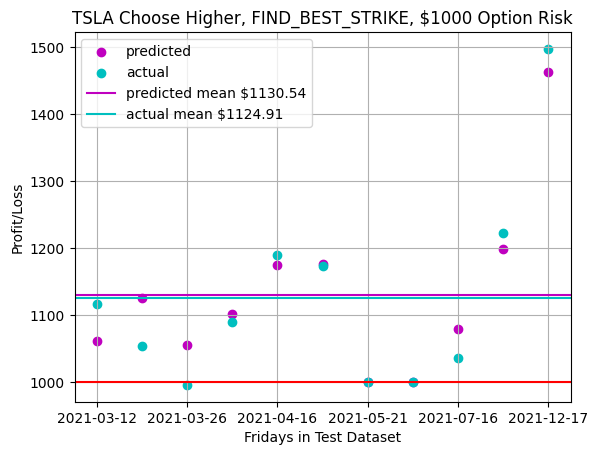

In [49]:
plt.scatter(pred_dates, choose_higher_predicted, label='predicted', color='m')
plt.scatter(pred_dates, choose_higher_actual, label='actual', color='c')
plt.title(f'{ticker} Choose Higher, {strike_strat}, ${risk} Option Risk')
plt.xticks(range(0,len(choose_higher_actual), len(choose_higher_actual)//4))

ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
predicted_mean = round((np.mean(choose_higher_predicted)),2)
actual_mean =round(( np.mean(choose_higher_actual)),2)
plt.axhline(y=predicted_mean, color='m', linestyle='-', label=f'predicted mean ${predicted_mean}')
plt.axhline(y=actual_mean, color='c', linestyle='-', label = f'actual mean ${actual_mean}')
plt.axhline(y=1000, color='r', linestyle='-')
plt.legend()
plt.grid(True)

same as above but slightly more in depth. doesnt show FIND_BEST_STRIKE because shares always getting chosen

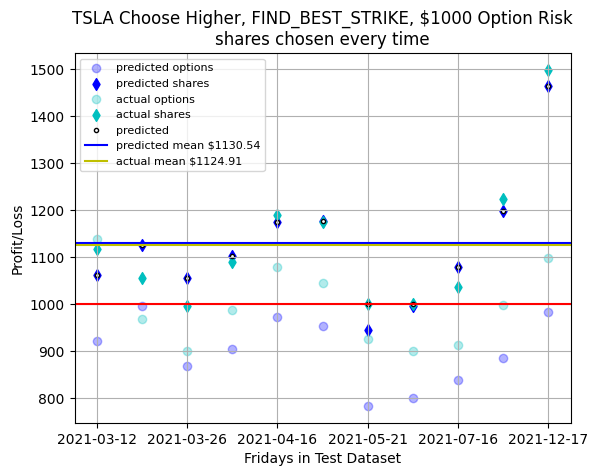

In [58]:
plt.scatter(pred_dates, predicted_PnL_options, label='predicted options', color='b', marker='o', alpha=.3)
plt.scatter(pred_dates, predicted_PnL_shares, label='predicted shares', color='b', marker='d', )
plt.scatter(pred_dates, optionPnL, label='actual options', color='c', marker='o', alpha=.3)
plt.scatter(pred_dates, sharePnL, label='actual shares', color='c', marker='d')
plt.scatter(pred_dates, choose_higher_predicted, label='predicted', edgecolors='black', color='white', s=9)
# plt.scatter(pred_dates, choose_higher_actual, label='actual', color='y', s=10)
plt.title(f'{ticker} Choose Higher, FIND_BEST_STRIKE, ${risk} Option Risk\nshares chosen every time')
plt.xticks(range(0,len(choose_higher_actual), len(choose_higher_actual)//4))
ylabel = plt.ylabel('Profit/Loss')
xLabel = plt.xlabel('Fridays in Test Dataset')
predicted_mean = round((np.mean(choose_higher_predicted)),2)
actual_mean =round(( np.mean(choose_higher_actual)),2)
plt.axhline(y=predicted_mean, color='b', linestyle='-', label=f'predicted mean ${predicted_mean}')
plt.axhline(y=actual_mean, color='y', linestyle='-', label = f'actual mean ${actual_mean}')
plt.axhline(y=1000, color='r', linestyle='-')
# plt.legend()
plt.legend( fontsize= "8", loc="upper left",)
plt.grid(True)
